In [5]:
# This step imports all the necessary modules
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
frauddata = pd.read_excel('BALY dataset.xlsx')

# Non visual numurical and categorical plot, plus changing of wrong data types

In [7]:
#Data exploration continues for non visual categorical and numurical plot
frauddata.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,days,is_fraud
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,52,0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,0,1
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,6,0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,50,0


In [17]:
frauddata.info()
#From here, we observe that ip_address should be a str while device_id should be string since it contains alphabets. Age should be integer instead of float64, while is_fraud should be boolean as it is a categorical data type.
#Therefore, is_fraud will be converted to a True/False boolean data type. Also, source, browser, sex will be converted to a cateogorical data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  int32  
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  bool   
dtypes: bool(1), float64(1), int32(1), int64(3), object(4)
memory usage: 9.9+ MB


In [38]:
#Right now, we will perform data cleaning after identifying the issues with the data types.
frauddata['ip_address'] = frauddata['ip_address'].astype('str')
frauddata['is_fraud'] = frauddata['is_fraud'].astype('bool')
frauddata['is_fraud'] = frauddata['is_fraud'].replace(['0'], False)
frauddata['is_fraud'] = frauddata['is_fraud'].replace(['1'], True)
frauddata['device_id'] = frauddata['device_id'].astype('str')
frauddata['user_id'] = frauddata['user_id'].astype('str')
frauddata['source'] = frauddata['source'].astype('category')
frauddata['browser'] = frauddata['browser'].astype('category')
frauddata['sex'] = frauddata['sex'].astype('category')

In [41]:
#Since age contains null values, lets convert these null values to another integer value and then clean them up later.
frauddata['age'] = frauddata['age'].fillna(-123)
frauddata['age'] = frauddata['age'].astype('int')
frauddata['age'] = frauddata['age'].replace([-123],np.nan)


In [42]:
#Lets see our overall dtypes. In conclusion, we have now cleaned the data types, now lets explore further.
frauddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   user_id         151112 non-null  object  
 1   purchase_value  151112 non-null  int64   
 2   device_id       151112 non-null  object  
 3   source          151112 non-null  category
 4   browser         151112 non-null  category
 5   sex             151112 non-null  category
 6   age             144546 non-null  float64 
 7   ip_address      151112 non-null  object  
 8   days            151112 non-null  int64   
 9   is_fraud        151112 non-null  bool    
dtypes: bool(1), category(3), float64(1), int64(2), object(3)
memory usage: 7.5+ MB


In [43]:
#Here, we have another non-visual plots of all the numurical data
frauddata.describe()

,purchase_value,age,days
count,151112.000000,144546.000000,151112.000000
mean,36.976110,33.147095,57.084169
std,19.857262,8.811238,36.185696
min,9.000000,18.000000,0.000000
25%,22.000000,26.000000,25.000000
50%,35.000000,32.000000,57.000000
75%,49.000000,39.000000,88.000000
max,1540.000000,76.000000,120.000000


In [44]:
frauddata.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,days,is_fraud
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,732758368,52,False
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,350311387,0,False
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,-2147483648,0,True
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41.0,-2147483648,6,False
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45.0,415583117,50,False


# Visual numurical plot

<AxesSubplot:>

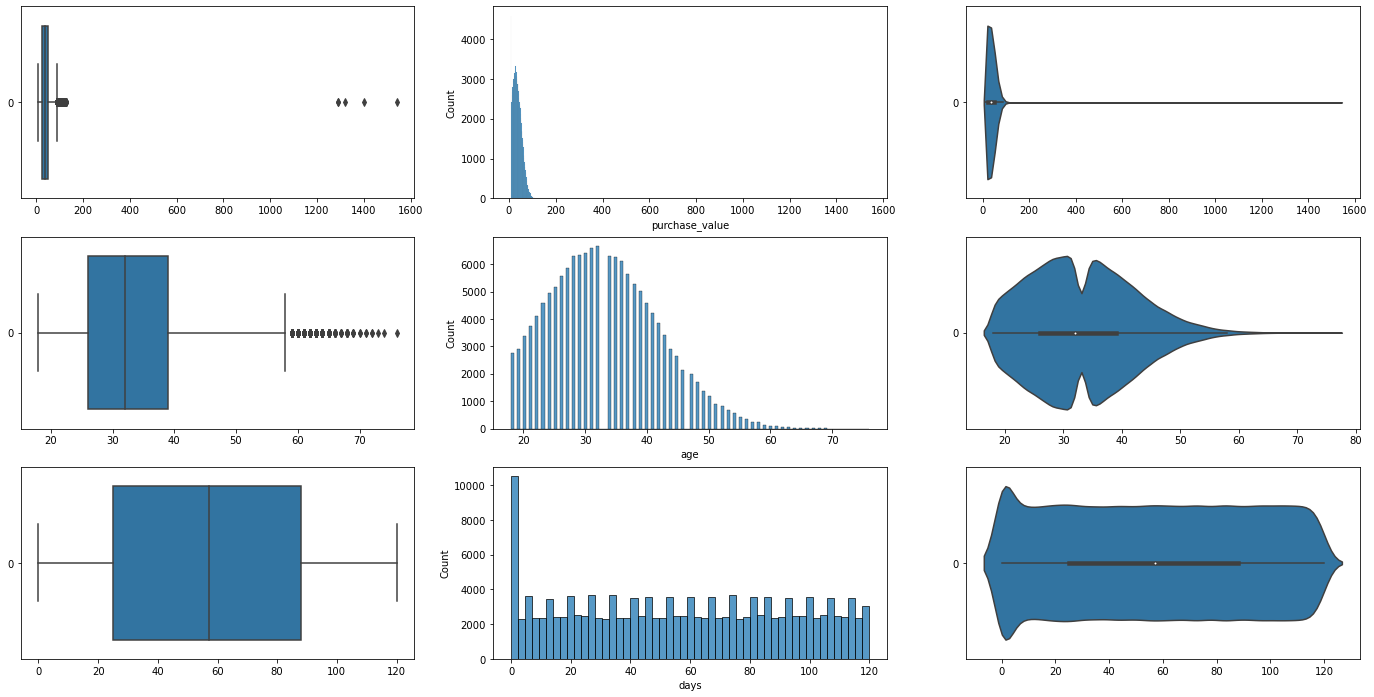

In [45]:
#Lets move on to visual plot of numurical data
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 3, figsize=(24, 12))#2rows, 3 columns

# Plot the basic uni-variate figures for purchase_value
sb.boxplot(data = frauddata['purchase_value'], orient = "h", ax = axes[0,0])
sb.histplot(data = frauddata['purchase_value'], ax = axes[0,1])
sb.violinplot(data = frauddata['purchase_value'], orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for age
sb.boxplot(data = frauddata['age'], orient = "h", ax = axes[1,0])
sb.histplot(data = frauddata['age'], ax = axes[1,1])
sb.violinplot(data = frauddata['age'], orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for days
sb.boxplot(data = frauddata['days'], orient = "h", ax = axes[2,0])
sb.histplot(data = frauddata['days'], ax = axes[2,1])
sb.violinplot(data = frauddata['days'], orient = "h", ax = axes[2,2])

# Visual categorical plot

<AxesSubplot:xlabel='age', ylabel='count'>

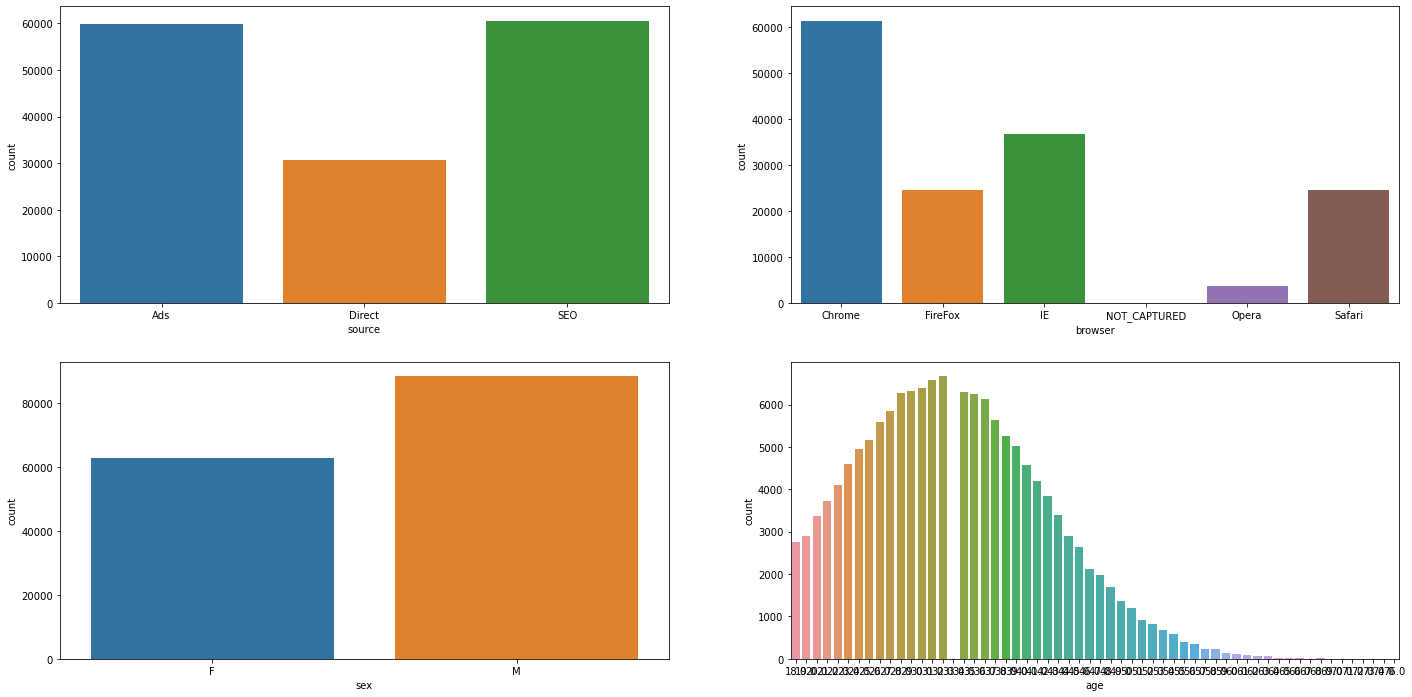

In [55]:
#Lets move on to visual plot of cat data of source,browser, sex and age.
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 2, figsize=(24, 12))#2rows, 2 columns

sb.countplot(x="source", data=frauddata, orient = "h", ax = axes[0,0])
sb.countplot(x="browser", data=frauddata, orient = "h", ax = axes[0,1])
sb.countplot(x="sex", data=frauddata, orient = "h", ax = axes[1,0])
sb.countplot(x="age", data=frauddata, orient = "h", ax = axes[1,1])

<AxesSubplot:xlabel='age', ylabel='count'>

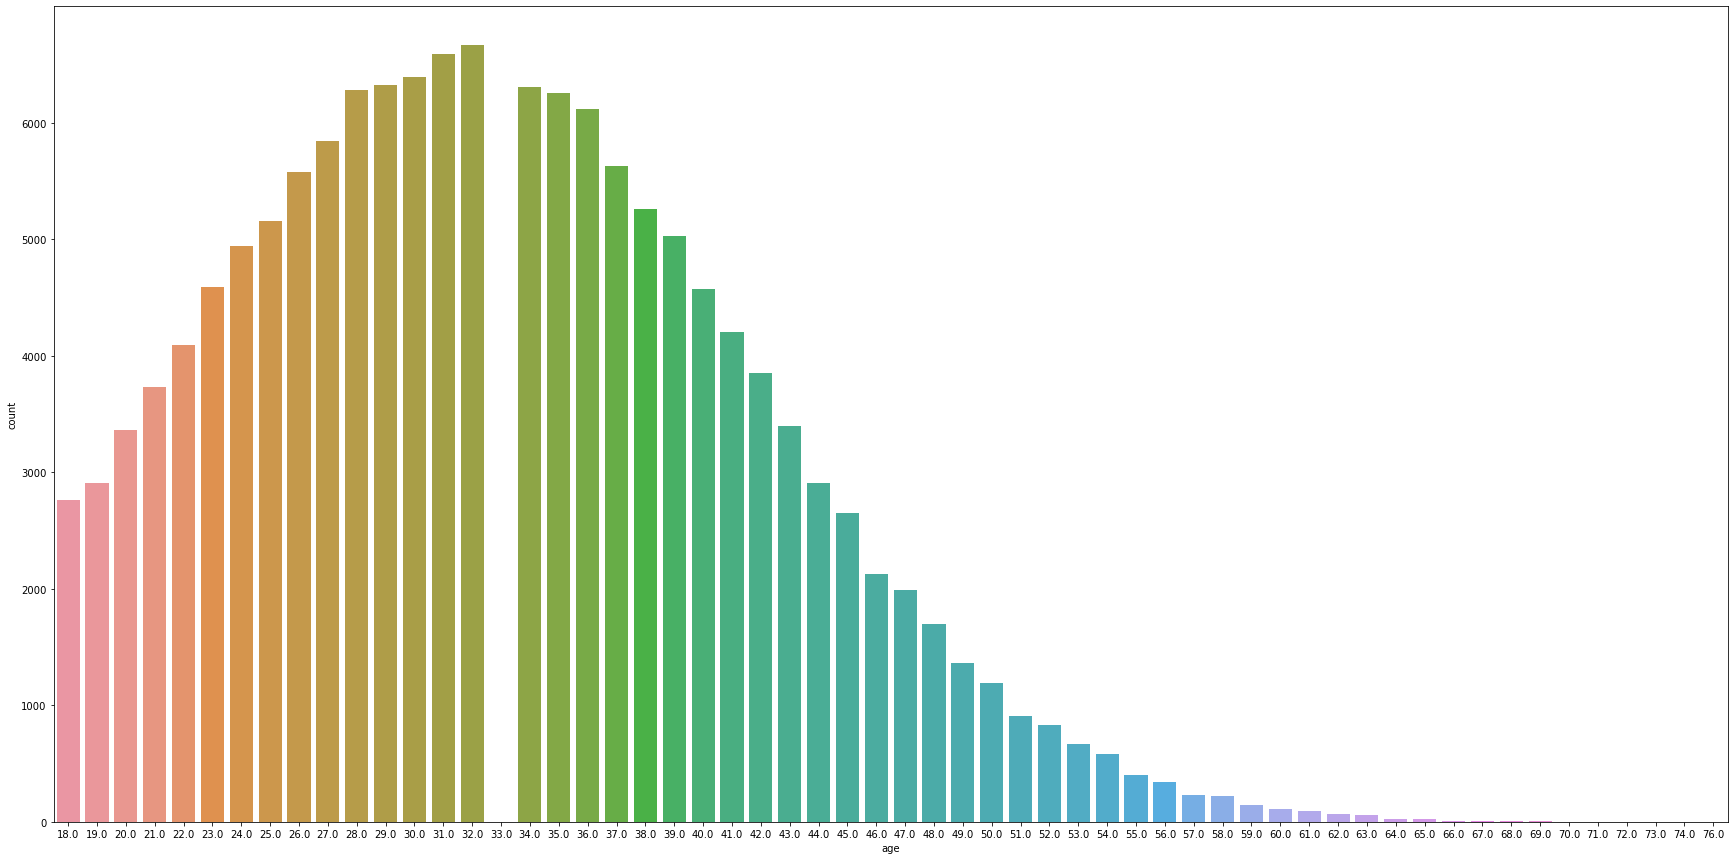

In [64]:
#Since countplot for age is small, we shall see it up close here.
f = plt.figure(figsize=(30, 15))
sb.countplot(x="age", data=frauddata, orient = "h")
#Right now, we can observe that the countplot follows a normal distribution, and that is quite accceptable.

# Finding insightful plots, which involves the use of is_fraud

<AxesSubplot:xlabel='age', ylabel='is_fraud'>

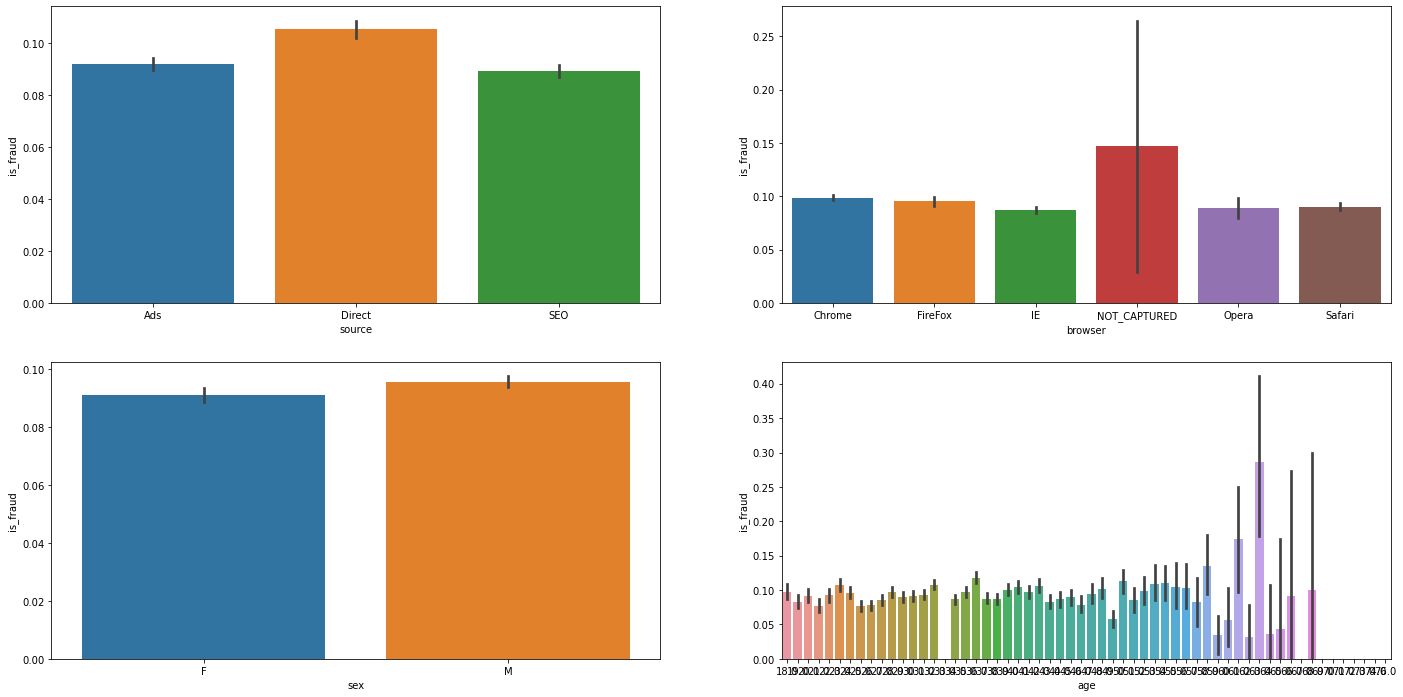

In [69]:
# Lets try to plot categorical variables against is_fraud
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.barplot(x="source", y="is_fraud", data=frauddata,  ax = axes[0,0])
sb.barplot(x="browser", y="is_fraud", data=frauddata,  ax = axes[0,1])
sb.barplot(x="sex", y="is_fraud", data=frauddata,  ax = axes[1,0])
sb.barplot(x="age", y="is_fraud", data=frauddata,  ax = axes[1,1])

<AxesSubplot:xlabel='age', ylabel='is_fraud'>

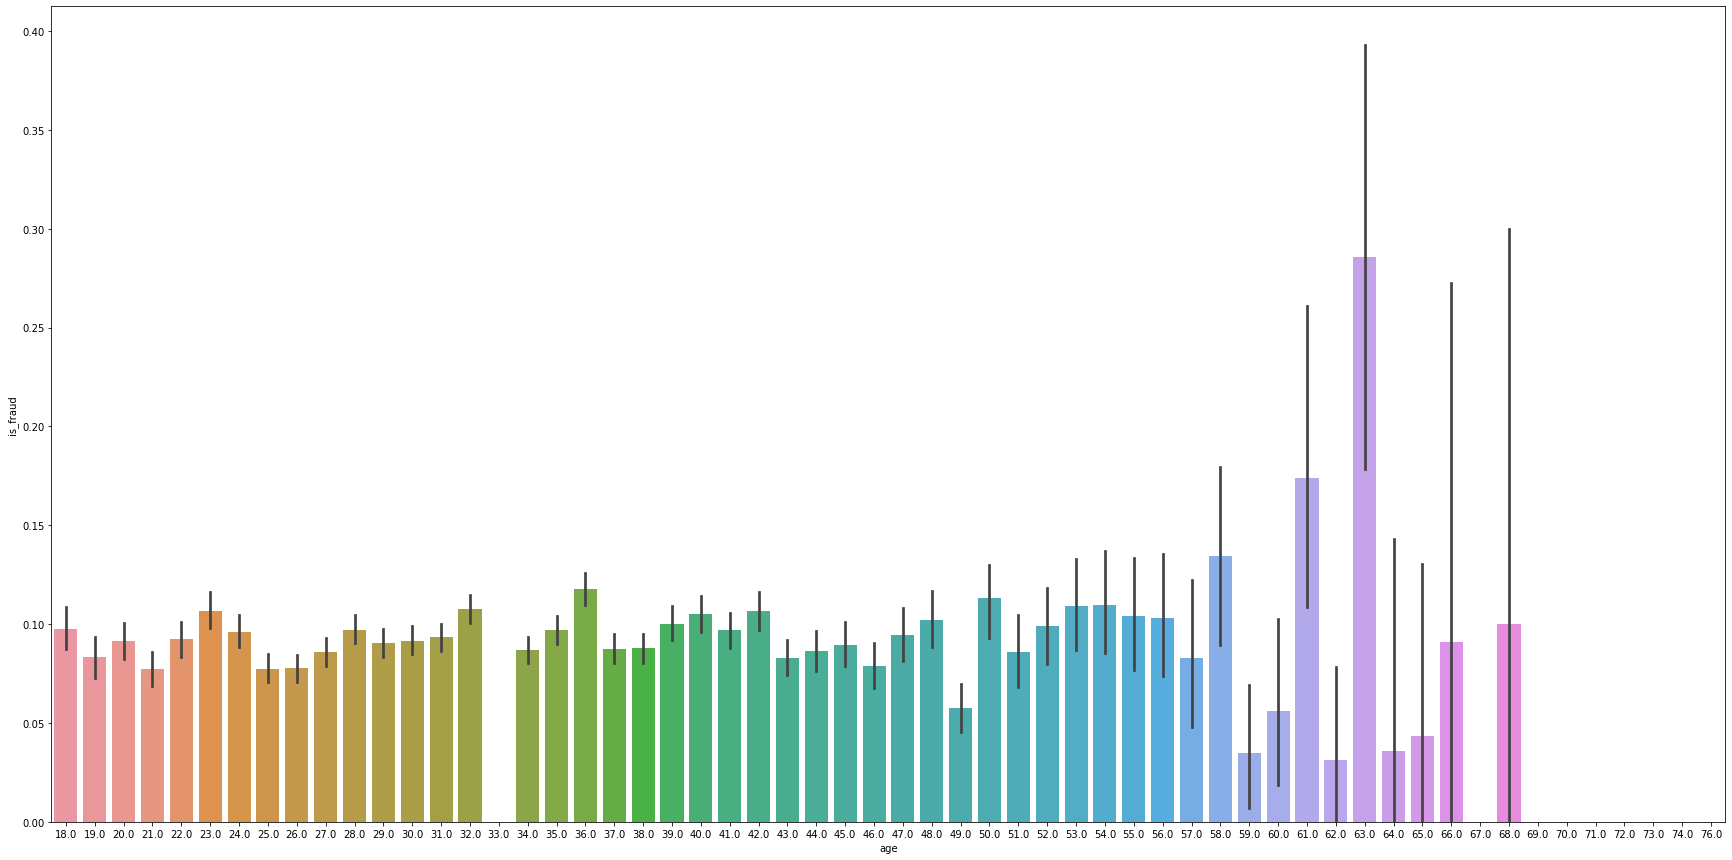

In [70]:
#Lets make is_fraud against age plot bigger for us to visualise better.
f = plt.figure(figsize=(30, 15))
sb.barplot(x="age", y="is_fraud", data=frauddata)
# As you can observe here, age 63 has the highest count of is_fraud. Hence, it is suspicious as it is a meaningful insight that I have discovered.

<AxesSubplot:xlabel='browser', ylabel='is_fraud'>

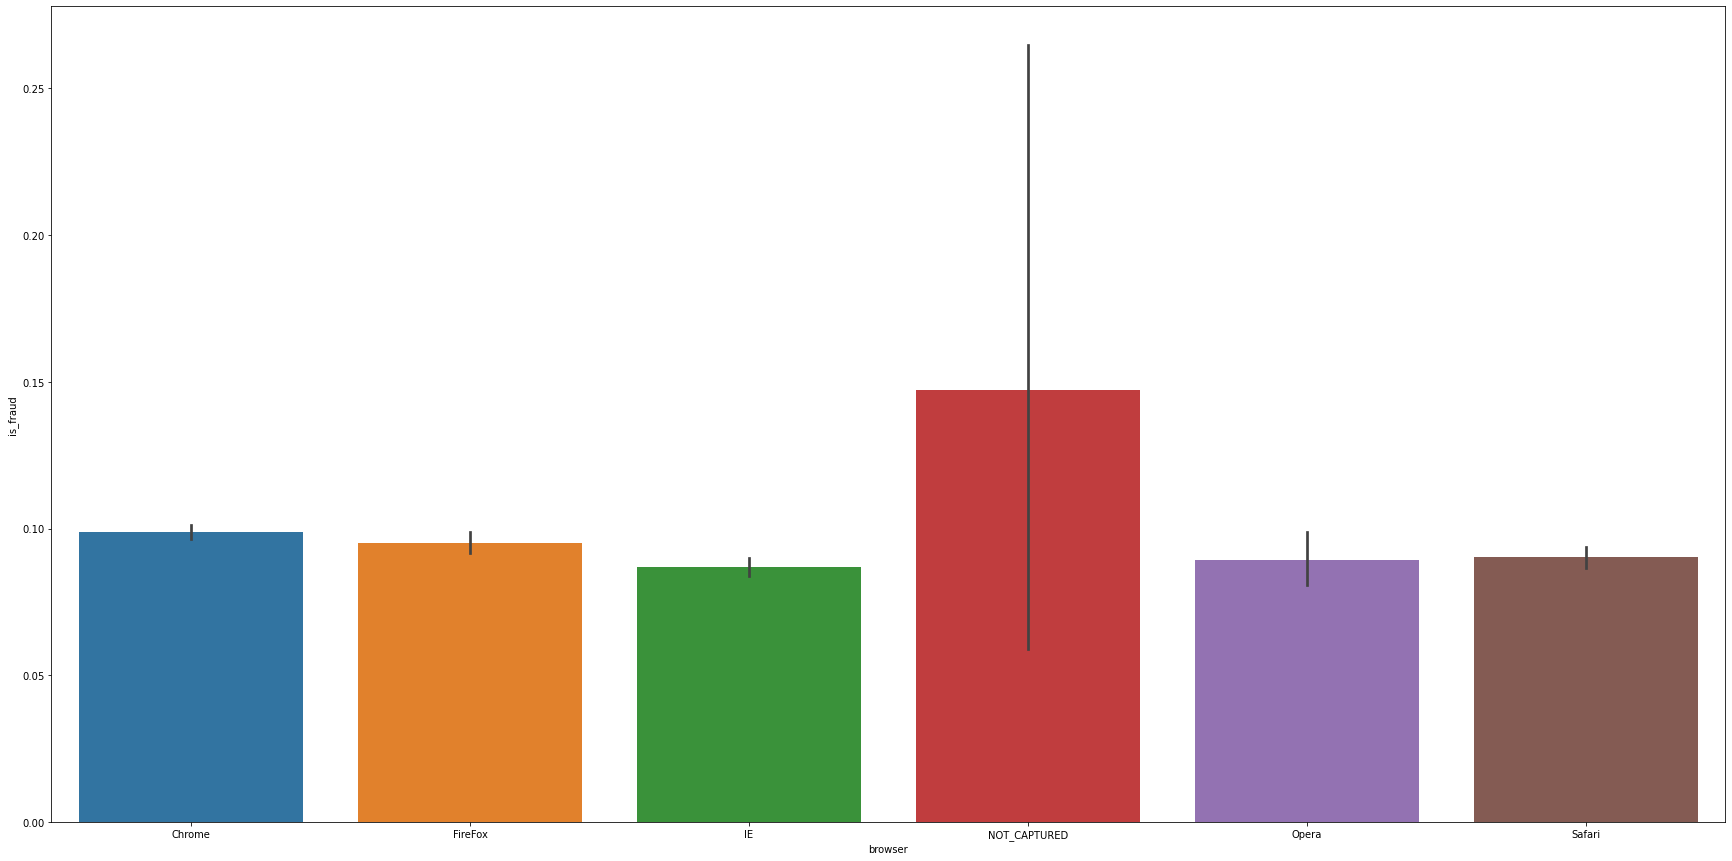

In [71]:
#Lets make is_fraud against browser plot bigger for us to visualise better.
f = plt.figure(figsize=(30, 15))
sb.barplot(x="browser", y="is_fraud", data=frauddata)
# Take note that although NOT_CAPTURED is signifcantly low as compared to the other sources when it comes to the overall transaction
# that took place, it represents significantly higher when it is plotted against is_fraud.

# In conclusion, I have discovered that the cybersecurity department should look into the age 63 as well as NOT_CAPTURED source of browser, as they are very likely to be a fradulant transaction.